In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv("Liver_diseases_prediction.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data["Albumin_and_Globulin_Ratio"].fillna("0",inplace=True)

In [4]:
data["Gender"].replace({"Female":0,"Male":1},inplace = True)

In [5]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [6]:
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.9
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.4
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.0
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.0


In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(466, 10)
(466,)
(117, 10)
(117,)


In [10]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [11]:
svm = SVC()
RFmodel = RandomForestClassifier()
KNN = KNeighborsClassifier()

In [12]:
svm.fit(X_train,Y_train)

SVC()

In [13]:
RFmodel.fit(X_train,Y_train)

RandomForestClassifier()

In [14]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

# Performance Metrics

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### SVM Model

In [16]:
svm_pred = svm.predict(X_test)

In [17]:
print("r2_score :",r2_score(Y_test,svm_pred))
print("MSE :",mean_squared_error(Y_test,svm_pred))
print("MAE :",mean_absolute_error(Y_test,svm_pred))
print("RMSE :",np.sqrt(mean_squared_error(Y_test,svm_pred)))

r2_score : -0.34482758620689613
MSE : 0.2564102564102564
MAE : 0.2564102564102564
RMSE : 0.5063696835418333


### Random Forest

In [18]:
RFmodel_pred = RFmodel.predict(X_test)

In [19]:
print("r2_score :",r2_score(Y_test,RFmodel_pred))
print("MSE :",mean_squared_error(Y_test,RFmodel_pred))
print("MAE :",mean_absolute_error(Y_test,RFmodel_pred))
print("RMSE :",np.sqrt(mean_squared_error(Y_test,RFmodel_pred)))

r2_score : -0.4344827586206892
MSE : 0.27350427350427353
MAE : 0.27350427350427353
RMSE : 0.5229763603684908


### KNN Model

In [20]:
KNN_pred = KNN.predict(X_test)

In [21]:
print("r2_score :",r2_score(Y_test,KNN_pred))
print("MSE :",mean_squared_error(Y_test,KNN_pred))
print("MAE :",mean_absolute_error(Y_test,KNN_pred))
print("RMSE :",np.sqrt(mean_squared_error(Y_test,KNN_pred)))

r2_score : -0.6586206896551721
MSE : 0.3162393162393162
MAE : 0.3162393162393162
RMSE : 0.5623515948579823


# Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [23]:
forest = RandomForestClassifier(random_state = 42)

In [24]:
n_estimators = [10, 15, 5, 8, 20, 50]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [10, 25, 35, 55]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10, 15] 

hyperF = dict(n_estimators = n_estimators, max_features=max_features, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = RandomizedSearchCV(forest, hyperF, cv = 5, verbose = 2, 
                      n_jobs = -1, n_iter=50)
bestF = gridF.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Nithiya Devi S\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [25]:
print(bestF.best_params_)

{'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 55}


In [26]:
rfe_trial = bestF.predict(X_train)
rfe_pred = bestF.predict(X_test)

In [27]:
print('Random Forest Hyperparameter:')
print('\n')
print(Y_test, rfe_pred)

Random Forest Hyperparameter:


355    2
407    1
90     1
402    1
268    1
      ..
516    1
305    2
167    1
312    2
329    2
Name: Dataset, Length: 117, dtype: int64 [1 1 1 1 1 1 2 1 2 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 2 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2
 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2
 1 2 1 1 1 1]


# Validation testing

In [28]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [29]:
RFmodel = RandomForestClassifier(random_state = 42)

In [30]:
accuracy = cross_val_score(RFmodel,X_train,Y_train,cv=5,scoring="accuracy")

In [31]:
np.mean(accuracy)

0.6931137039579044

In [32]:
y_pred = cross_val_predict(RFmodel,X_train,Y_train,cv=5)
y_pred

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,

C:\Users\Nithiya Devi S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

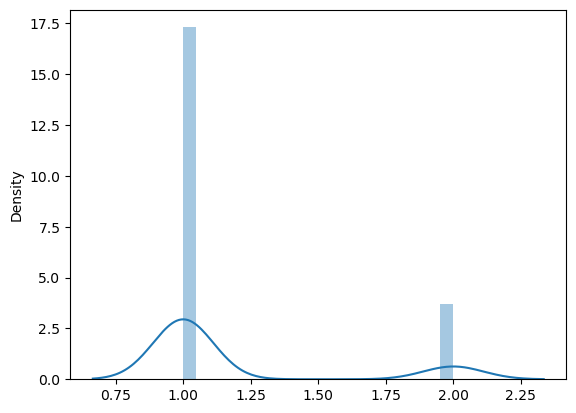

In [33]:
sb.distplot(y_pred)